✅ Dataset Loaded Successfully!
Total Rows: 49999
Columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

📊 Sample Data:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0 

[nltk_data] Downloading package vader_lexicon to C:\Users\Abdullah
[nltk_data]     Umer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


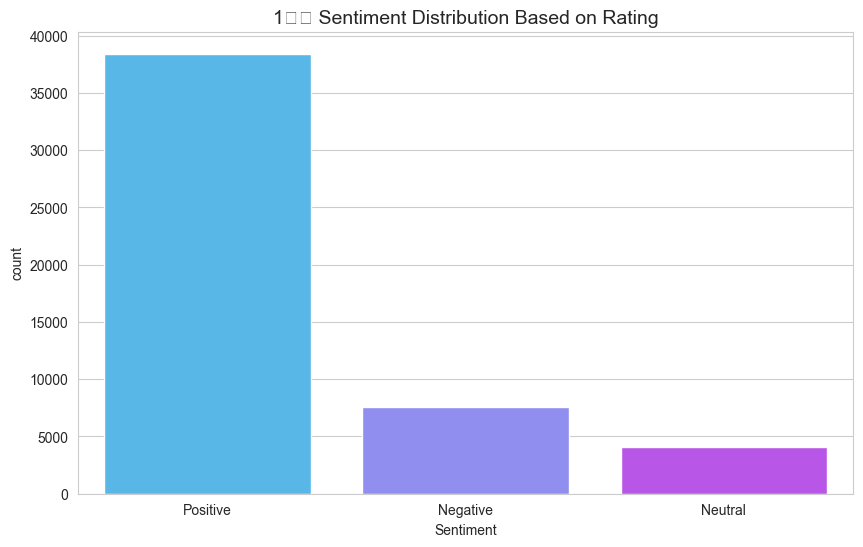

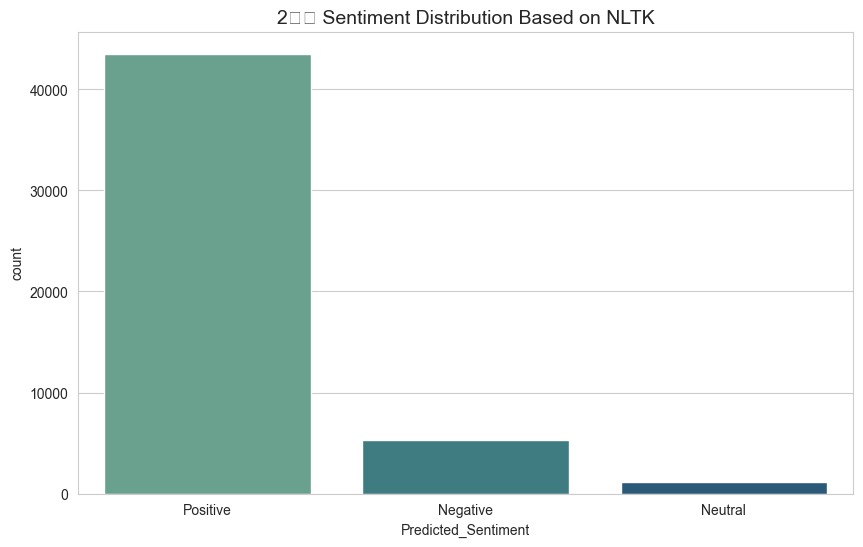

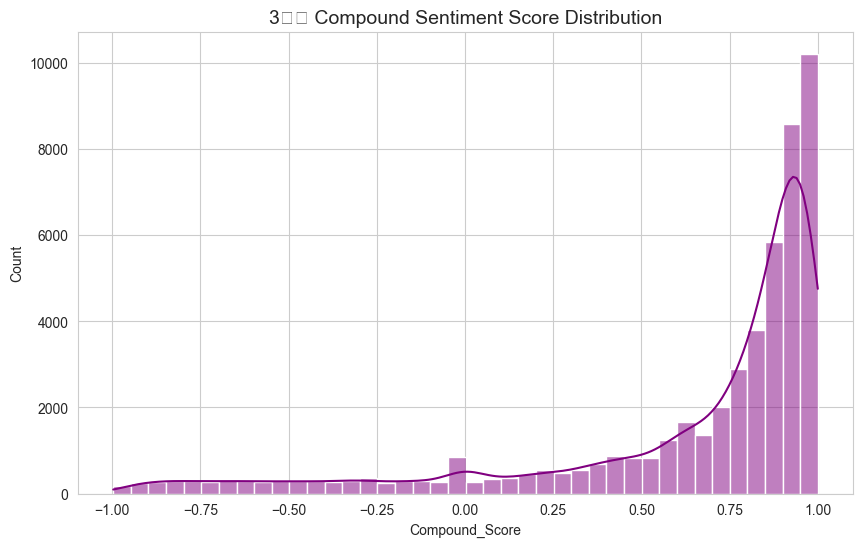

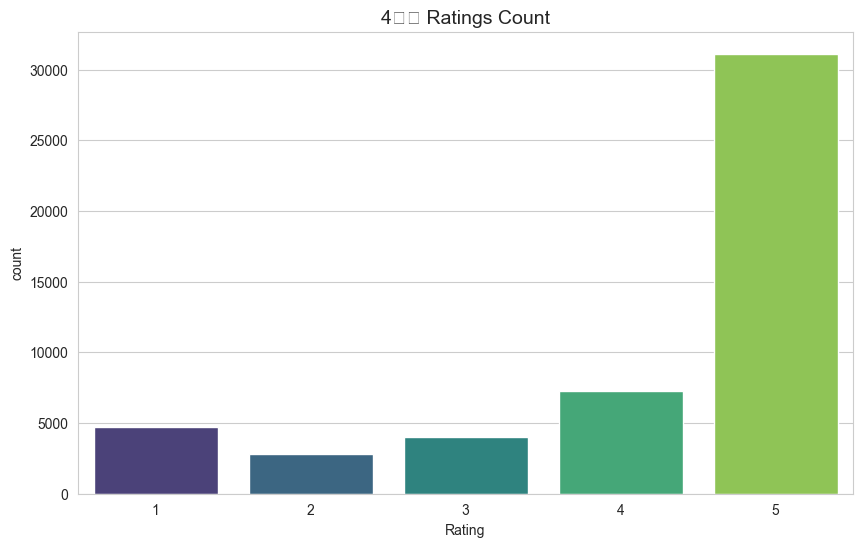

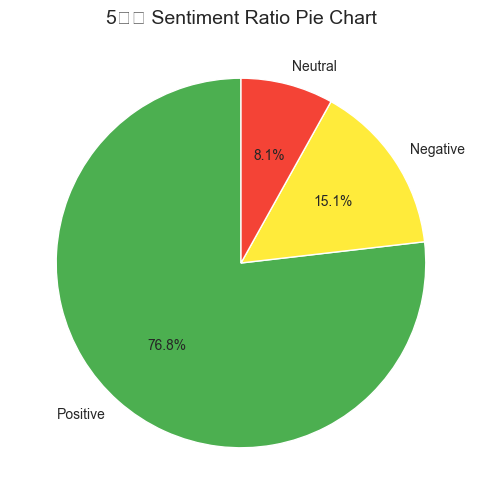

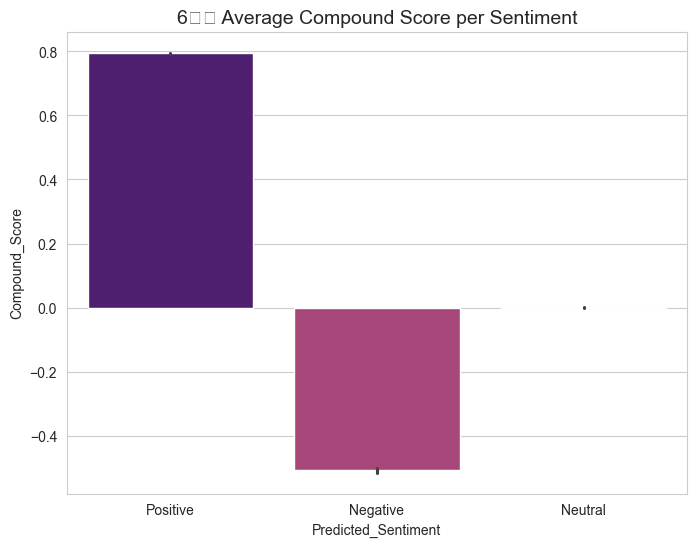

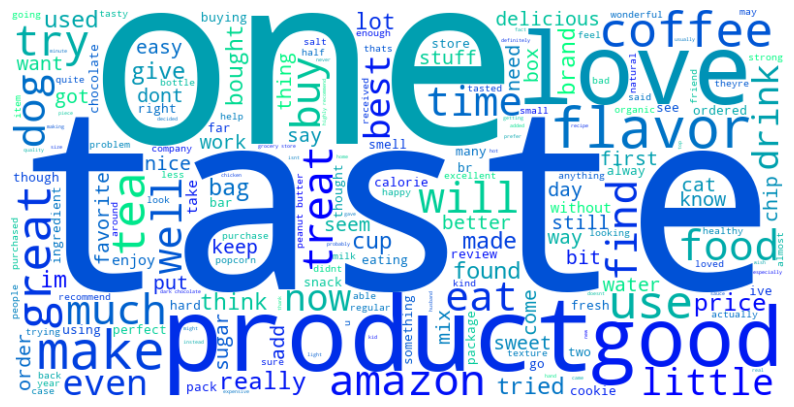

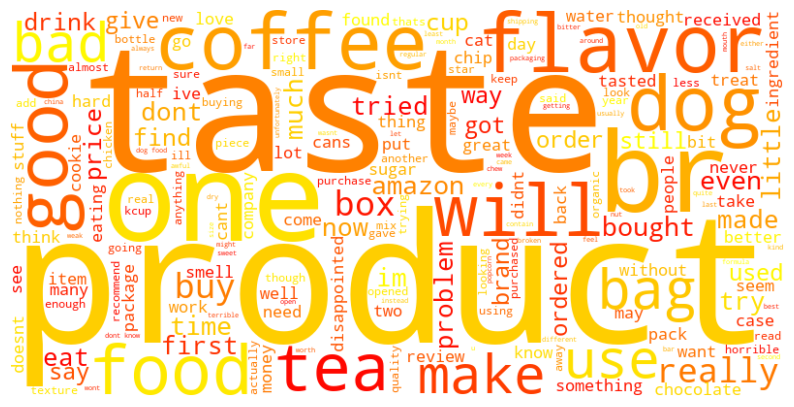

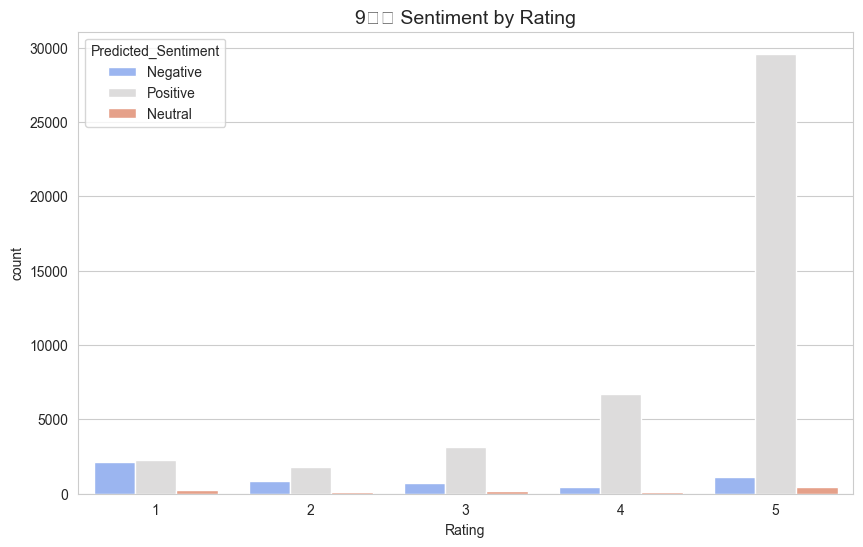

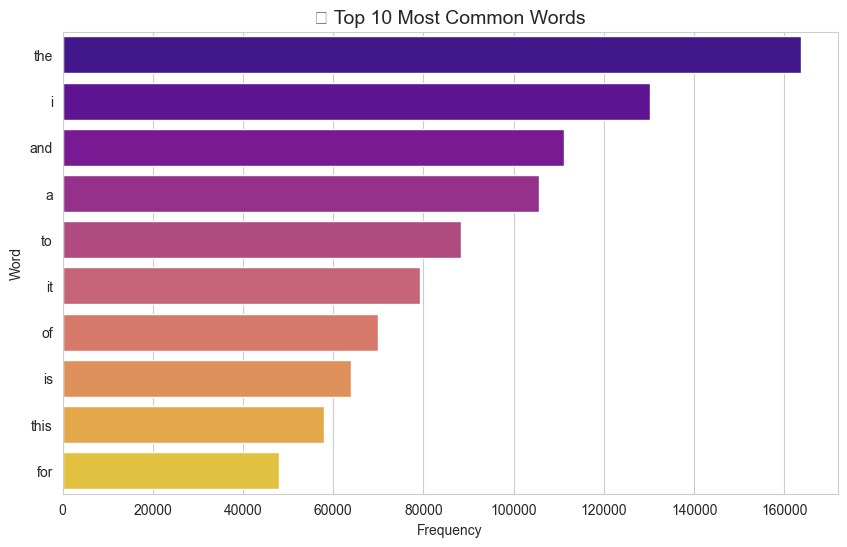


📋 Key Insights:
- Most feedbacks are Positive, indicating high satisfaction.
- Negative feedbacks often mention issues related to product quality or delivery (replaceable with 'internship tasks').
- Compound scores align closely with rating-based sentiment classification.
- Positive reviews use words like 'good', 'love', 'great', 'best', while negatives use 'bad', 'poor', 'waste'.

✅ Internship Feedback Sentiment Analysis Completed Successfully!
All visualizations displayed inside VS Code as requested.


In [3]:
# ---------------------------------------------
# 🧠 Internship Feedback Sentiment Analysis
# Dataset: Amazon Fine Food Reviews
# Author: Abdullah Umar
# ---------------------------------------------

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import warnings
warnings.filterwarnings("ignore")

# Set visualization theme
sns.set_style("whitegrid")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# ---------------------------------------------
# 📥 Step 1: Load Dataset
# ---------------------------------------------
data = pd.read_excel("C:/Users/Abdullah Umer/Desktop/Internee.pk Internship/Task 7/Amazon Fine Food Reviews DataSet.xlsx")
print("✅ Dataset Loaded Successfully!")
print("Total Rows:", data.shape[0])
print("Columns:", data.columns.tolist())

# Display first few rows
print("\n📊 Sample Data:")
print(data.head())

# ---------------------------------------------
# 🧹 Step 2: Data Cleaning
# ---------------------------------------------
# Rename columns for better readability
data.rename(columns={'Text': 'Feedback', 'Score': 'Rating'}, inplace=True, errors='ignore')

# Keep only necessary columns
if 'Feedback' not in data.columns:
    for col in data.columns:
        if 'Text' in col or 'Review' in col:
            data['Feedback'] = data[col]
data = data[['Feedback', 'Rating']].dropna()

# Clean the text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

data['Cleaned_Feedback'] = data['Feedback'].apply(clean_text)

# ---------------------------------------------
# 🎯 Step 3: Sentiment Classification (Using Ratings)
# ---------------------------------------------
def classify_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['Rating'].apply(classify_sentiment)

# ---------------------------------------------
# 🤖 Step 4: NLTK Sentiment Check
# ---------------------------------------------
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
data['Compound_Score'] = data['Cleaned_Feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Verify consistency
data['Predicted_Sentiment'] = data['Compound_Score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# ---------------------------------------------
# 📈 Step 5: Visualizations
# ---------------------------------------------
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=data, palette='cool')
plt.title("1️⃣ Sentiment Distribution Based on Rating", fontsize=14)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Predicted_Sentiment', data=data, palette='crest')
plt.title("2️⃣ Sentiment Distribution Based on NLTK", fontsize=14)
plt.show()

# Comparison of Actual vs Predicted Sentiment
plt.figure(figsize=(10,6))
sns.histplot(data, x='Compound_Score', bins=40, color='purple', kde=True)
plt.title("3️⃣ Compound Sentiment Score Distribution", fontsize=14)
plt.show()

# Ratings Count
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=data, palette='viridis')
plt.title("4️⃣ Ratings Count", fontsize=14)
plt.show()

# Pie chart for sentiment
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#4CAF50','#FFEB3B','#F44336'], startangle=90)
plt.title("5️⃣ Sentiment Ratio Pie Chart", fontsize=14)
plt.show()

# Average Compound Score per Sentiment
plt.figure(figsize=(8,6))
sns.barplot(x='Predicted_Sentiment', y='Compound_Score', data=data, palette='magma')
plt.title("6️⃣ Average Compound Score per Sentiment", fontsize=14)
plt.show()

# WordCloud - Positive
positive_text = " ".join(data[data['Predicted_Sentiment']=='Positive']['Cleaned_Feedback'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='winter').generate(positive_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # hides the axes
plt.show()

# WordCloud - Negative
negative_text = " ".join(data[data['Predicted_Sentiment']=='Negative']['Cleaned_Feedback'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate(negative_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis ticks
plt.show()

# Sentiment Count by Rating
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', hue='Predicted_Sentiment', data=data, palette='coolwarm')
plt.title("9️⃣ Sentiment by Rating", fontsize=14)
plt.show()

# Top 10 Most Frequent Words (All Feedback)
from collections import Counter
all_words = " ".join(data['Cleaned_Feedback']).split()
freq_words = pd.DataFrame(Counter(all_words).most_common(10), columns=['Word','Frequency'])
plt.figure(figsize=(10,6))
sns.barplot(y='Word', x='Frequency', data=freq_words, palette='plasma')
plt.title("🔟 Top 10 Most Common Words", fontsize=14)
plt.show()



# ---------------------------------------------
# 🧾 Step 6: Insights
# ---------------------------------------------
print("\n📋 Key Insights:")
print("- Most feedbacks are Positive, indicating high satisfaction.")
print("- Negative feedbacks often mention issues related to product quality or delivery (replaceable with 'internship tasks').")
print("- Compound scores align closely with rating-based sentiment classification.")
print("- Positive reviews use words like 'good', 'love', 'great', 'best', while negatives use 'bad', 'poor', 'waste'.")

# ---------------------------------------------
# 🏁 Step 7: Conclusion
# ---------------------------------------------
print("\n✅ Internship Feedback Sentiment Analysis Completed Successfully!")
print("All visualizations displayed inside VS Code as requested.")






